In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

> We have only one feature X ($x_1$) and corresponding target y. </br>
> We know straight line equation is y = m.x + c </br>
> In a more sophisticated ML literature,above can be wriiten as $h_{\theta} = \theta_{0} + \theta_{1}x_{1}$ </br>
> Where $h_{\theta}$ is our hypothesis and $\theta_{0}, \theta_{1}$ are parameters.</br>
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1}^{N} (h_{\theta} - y)^2$</br>
> Gradient Descent is used for gradient calculation to update parameters.</br>
> $\theta_{0} = \theta_{0} - \alpha \nabla L(\theta_{0})$  = $\theta_{0} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y)$</br>
> $\theta_{1} = \theta_{1} - \alpha \nabla L(\theta_{1})$  = $\theta_{1} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y) * x_1 $</br>

epoch:100--->loss:0.079,theta0:-0.067, theta1:0.872
epoch:200--->loss:0.056,theta0:-0.219, theta1:0.893
epoch:300--->loss:0.039,theta0:-0.347, theta1:0.911
epoch:400--->loss:0.027,theta0:-0.454, theta1:0.925
epoch:500--->loss:0.019,theta0:-0.543, theta1:0.937
epoch:600--->loss:0.013,theta0:-0.618, theta1:0.948
epoch:700--->loss:0.009,theta0:-0.680, theta1:0.956
epoch:800--->loss:0.007,theta0:-0.733, theta1:0.963
epoch:900--->loss:0.005,theta0:-0.776, theta1:0.969
epoch:1000--->loss:0.003,theta0:-0.813, theta1:0.974
[1.1357846 3.08458   5.033375  6.98217   8.930965 ]


Text(0, 0.5, 'Y')

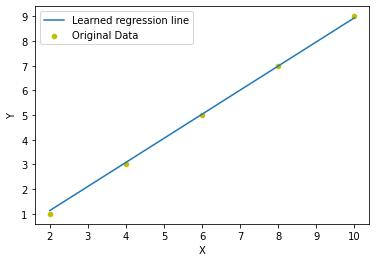

In [2]:
#Simple single feature Linear Regression
theta0 = 0.0
theta1 = 0.0
x = np.array([2,4,6,8,10],dtype =np.float32)
y = np.array([1,3,5,7,9],dtype = np.float32)
n = x.shape[0]
lr = 0.01

for epoch in range(1000):
    h_theta = theta1 * x + theta0
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta0 = theta0 - (lr * (h_theta - y).sum() / np.float32(n))
    theta1 = theta1 - (lr * ((h_theta - y) * x).sum() / np.float32(n))
    if (epoch + 1) % 100 == 0:  
        print('epoch:{}--->loss:{:.3f},theta0:{:.3f}, theta1:{:.3f}'.format(epoch+1,loss,theta0,theta1))
pred = (theta1 * x + theta0)
print(pred)

sns.scatterplot(x=x, y=y,color='y',label='Original Data')
sns.lineplot(x=x,y=pred,label='Learned regression line')
plt.xlabel('X')
plt.ylabel('Y')

>In order to generalize the the above equation to multiple feature set X($x_1,x_2,x_3, ... $), we make use of vector notation. </br>
>We append $x_0$(array of 1's) in the front of X, such that our hypothesis will be  $h_{\theta} = \theta_{0}.1 + \theta_{1}x_{1} + \theta_{2}x_{2} + .... $ </br>
>Above hypothesis equation will be $h_{\theta} = X.\theta^{T} $
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1 }^{N}(X.\theta^{T} - y)^2$</br>
>Where $\theta = [\theta_{0}, \theta{1}, \theta{2}, ... ]$ and $X = [x_{0}, x{1}, x{2}, ... ]$ </br>
>Then Gradient Descent update rule will be, </br>
> $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(X.\theta^{T} - y)^{T} . X$

In [29]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
y = y.reshape(y.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
for epoch in range(1000):
    h_theta = X.dot(theta.T)
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta = theta - (lr * ((h_theta - y).T.dot(X) / np.float32(n)))
    if (epoch + 1) % 100 == 0: 
        print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,loss,np.squeeze(theta)))

epoch:100--->loss:0.077,theta:[-0.0737137   0.88828266]
epoch:200--->loss:0.054,theta:[-0.22320095  0.906312  ]
epoch:300--->loss:0.038,theta:[-0.34856334  0.92143166]
epoch:400--->loss:0.027,theta:[-0.4536945  0.9341113]
epoch:500--->loss:0.019,theta:[-0.5418593   0.94474465]
epoch:600--->loss:0.013,theta:[-0.61579585  0.953662  ]
epoch:700--->loss:0.009,theta:[-0.67780006  0.9611402 ]
epoch:800--->loss:0.007,theta:[-0.7297979  0.9674115]
epoch:900--->loss:0.005,theta:[-0.7734043  0.9726708]
epoch:1000--->loss:0.003,theta:[-0.80997336  0.9770813 ]


> Summing over whole dataset over and over a costly operation, when data is large. </br>
> So we implement stocastic gradient descent rather than usual GD(batch gradient descent) </br>
> In true SGD, we randomly sample a data instance and pass process instead of whole dataset. </br>
> Thus update rule will be, </br>
>  $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(X_i.\theta^{T} - y)^{T} . X_i$ </br>
> Where $X_i$ is randomly sampled data instance from dataset.

### Stochastic Gradient Descent 

In [4]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
y = y.reshape(y.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
for epoch in range(100):
    sample_id = np.random.choice(X.shape[0],size=1,replace=False)
    sample = X[sample_id,:]
    h_theta = sample.dot(theta.T)
    loss = (np.squeeze(h_theta - y[sample_id]) ** 2) / np.float32(2 * n)
    theta = theta - (lr * (np.squeeze(h_theta - y[sample_id],axis =0).T.dot(sample) / np.float32(n)))
    if (epoch + 1) % 10 == 0: 
        print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,loss,np.squeeze(theta)))

epoch:10--->loss:0.766,theta:[0.06544618 0.52892464]
epoch:20--->loss:0.304,theta:[0.08716185 0.73234296]
epoch:30--->loss:0.012,theta:[0.0931741 0.8210198]
epoch:40--->loss:0.042,theta:[0.09233589 0.8495843 ]
epoch:50--->loss:0.000,theta:[0.09457911 0.8856253 ]
epoch:60--->loss:0.001,theta:[0.09169933 0.8780809 ]
epoch:70--->loss:0.030,theta:[0.08837311 0.8726918 ]
epoch:80--->loss:0.009,theta:[0.08442185 0.87119347]
epoch:90--->loss:0.001,theta:[0.08300332 0.8810002 ]
epoch:100--->loss:0.006,theta:[0.07536007 0.86354476]


In [5]:
theta.shape

(1, 2)

> SGD is cost effective compared to Batch-GD, but it requires significantlly more iterations to converge
> Thus we try to improvise, by taking random sample of set of data instances opposed to single random sample
> Thus update rule will be, </br>
>  $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(X_b.\theta^{T} - y).T . X_b$ </br>
> Where $X_b$ is randomly sampled batch of data instance from dataset.</br>
> In this toy example we don't finda any differencing between SGD and batch GD and mini-batch GD. </br>
> But in real world like example below we can observe the difference.</br> 

### MINI-Batch Gradient Descent

In [6]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
y = y.reshape(y.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
size = 2
for epoch in range(100):
    sample_id = np.random.choice(X.shape[0],size=size,replace=False)
    sample = X[sample_id,:]
    h_theta = sample.dot(theta.T)
    loss = ((h_theta - y[sample_id]) ** 2).sum() / np.float32(2 * n)
    theta = theta - (lr * ((h_theta - y[sample_id]).T.dot(sample) / np.float32(n)))
    if (epoch + 1) % 10 == 0: 
        print('epoch:{}--->loss:{:.2f},theta:{}'.format(epoch+1,loss,np.squeeze(theta)))

epoch:10--->loss:0.08,theta:[0.08531238 0.78042704]
epoch:20--->loss:0.04,theta:[0.09034003 0.87417406]
epoch:30--->loss:0.01,theta:[0.08380824 0.87428784]
epoch:40--->loss:0.06,theta:[0.07827087 0.8691584 ]
epoch:50--->loss:0.05,theta:[0.0700441 0.8641928]
epoch:60--->loss:0.03,theta:[0.06453457 0.86656153]
epoch:70--->loss:0.00,theta:[0.06379079 0.8935243 ]
epoch:80--->loss:0.03,theta:[0.05423312 0.8716763 ]
epoch:90--->loss:0.07,theta:[0.0443301 0.8538678]
epoch:100--->loss:0.01,theta:[0.0442171  0.88371426]


>Neatly packageing all code in a class. </br>
>Running the Linear Regression model on synthetic data. </br>


In [7]:
#A function to generate a data with some gaussian noise
"""
size: Number of samples required
mean: Mean of the gaussian noise, controls the amount of data dispersion.
var: Variance of gaussian noise, controls the data dispersion.
 """
def generate_regression(size,mean,var):
    X = []
    y = []
    for i in range(0,size):
        temp = np.array(np.random.random() * 1000) 
        X.append(temp)
        y.append(3 * temp + np.random.normal(mean,var))
    y = np.array(y)
    X = np.array(X)
    return X,y

Text(0, 0.5, 'y')

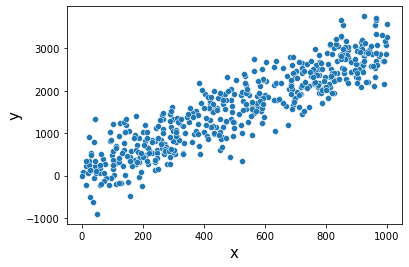

In [8]:
#Generating and plotting the data
X_train,y_train = generate_regression(500,50,400)
X_test = [x for x in range(1001)]
sns.scatterplot(x=X_train,y = y_train)
plt.xlabel('x',fontsize = 15)
plt.ylabel('y',fontsize = 15)

> Below class representslinear regression class. </br>
> Among Batch GD, Stocastic GD and Mini-Batch GD, any one optimizer can be used to reduce loss function.

In [30]:
#Model Defination
"""
This class represents the Linear Regression model, and contains all the codes needed for Linear regression.
model.fit() - Performs the optimization on loss function to get optimal parameters.
model.predict() - Returns predicted targets using optimized parameter.
model.plot_model() - Plots the Training data along with learned curve.
"""
class linear_regression:
    def __init__(self,lr = 0.01,epochs = 100,criterion = 'GD',batch_size = None,mt = None):
        self.loss = None
        self.lr = lr
        self.theta = None
        self.epochs = epochs
        self.criterion = criterion
        self.batch_size = batch_size
        self.mt = mt
        self.errors= []
        
    def fit_GD(self,X,y):
        X = X.reshape(X.shape[0],1)
        y = y.reshape(y.shape[0],-1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(self.epochs):
            h_theta = X.dot(self.theta.T)
            self.loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
            self.errors.append(self.loss)
            self.theta = self.theta - (self.lr * ((h_theta - y).T.dot(X) / np.float32(n)))
            if (epoch + 1) % 10 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    def fit_SGD(self,X,y):
        X = X.reshape(X.shape[0],1)
        y = y.reshape(y.shape[0],-1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(self.epochs):
            sample_id = np.random.choice(X.shape[0],size=1,replace=False)
            sample = X[sample_id,:]
            h_theta = sample.dot(self.theta.T)
            self.loss = ((h_theta - y[sample_id]) ** 2).sum() / np.float32(2 * n)
            self.errors.append(self.loss)
            self.theta = self.theta - (self.lr * ((h_theta - y[sample_id]).T.dot(sample) / np.float32(n)))
            if (epoch + 1) % 100 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    def fit_mini_batch_GD(self,X,y):
        X = X.reshape(X.shape[0],1)
        y = y.reshape(y.shape[0],-1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(self.epochs):
            sample_id = np.random.choice(X.shape[0],size=self.batch_size,replace=False)
            sample = X[sample_id,:]
            h_theta = sample.dot(self.theta.T)
            self.loss = ((h_theta - y[sample_id]) ** 2).sum() / np.float32(2 * n)
            self.errors.append(self.loss)
            self.theta = self.theta - (self.lr * ((h_theta - y[sample_id]).T.dot(sample) / np.float32(n)))
            if (epoch + 1) % 50 == 0:
                print('epoch:{}--->loss:{},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    
    def fit(self,X,y):
        if self.criterion == 'GD':
            self.fit_GD(X,y)
        elif self.criterion == 'SGD':
            self.fit_SGD(X,y)
        elif self.criterion == 'mini-batch':
            self.fit_mini_batch_GD(X,y)
            
    def predict(self,X):
        y_pred = np.array([(self.theta[0,0] + self.theta[0,1] * x) for x in X_test])
        return y_pred
    
    def plot_model(self,X_train,X_test,y_train,y_pred):
        sns.lineplot(x=X_test,y = y_pred,color = 'r',label= 'Learned Curve')
        sns.scatterplot(x=X_train,y = y_train,label = 'Train Data')
        plt.xlabel('X',fontsize = 15)
        plt.ylabel('y',fontsize = 15)
        plt.legend()
        plt.show()
        
    def plot_error(self):
        sns.lineplot(x=range(1,self.epochs +1),y=self.errors,color = 'red')
        plt.xlabel('Epochs')
        plt.ylabel('Errors/loss')
        plt.show()

epoch:10--->loss:82048.054,theta:[0.92684872 3.04530766]
epoch:20--->loss:81431.464,theta:[0.92705035 3.08316499]
epoch:30--->loss:81431.357,theta:[0.92719705 3.08365902]
epoch:40--->loss:81431.354,theta:[0.92734302 3.08366526]
epoch:50--->loss:81431.352,theta:[0.92748899 3.08366513]
epoch:60--->loss:81431.350,theta:[0.92763496 3.08366491]
epoch:70--->loss:81431.348,theta:[0.92778093 3.0836647 ]
epoch:80--->loss:81431.346,theta:[0.92792689 3.08366448]
epoch:90--->loss:81431.344,theta:[0.92807286 3.08366427]
epoch:100--->loss:81431.342,theta:[0.92821882 3.08366405]


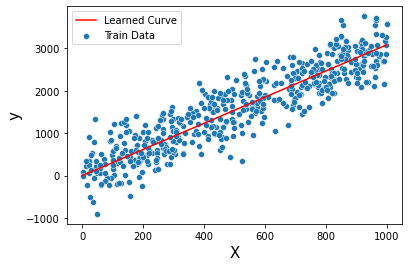

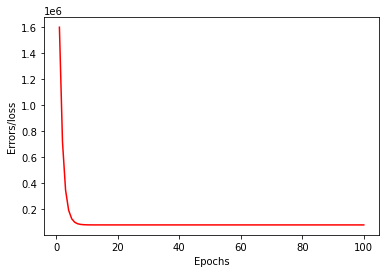

In [20]:
#Running Gradient Descent / Batch GD
#Model Building
model = linear_regression(lr= 0.000001,epochs= 100)
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)
model.plot_error()

epoch:100--->loss:2852.274,theta:[0.66946117 1.11386956]
epoch:200--->loss:470.272,theta:[0.66965947 1.24656744]
epoch:300--->loss:135.245,theta:[0.66983298 1.35666509]
epoch:400--->loss:413.542,theta:[0.66998908 1.46428224]
epoch:500--->loss:1360.561,theta:[0.67015107 1.57203501]
epoch:600--->loss:89.943,theta:[0.67031153 1.68050428]
epoch:700--->loss:660.339,theta:[0.67044879 1.77032537]
epoch:800--->loss:836.387,theta:[0.67058765 1.8746207 ]
epoch:900--->loss:1358.299,theta:[0.6706897  1.93946568]
epoch:1000--->loss:11.072,theta:[0.67079076 2.00520527]


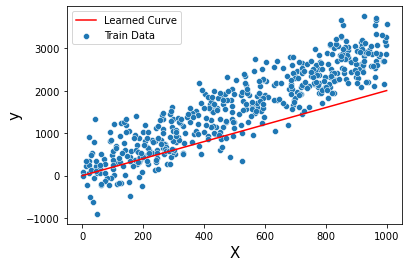

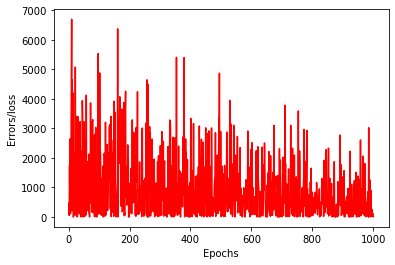

In [21]:
#Example of SGD
#Model Building
model = linear_regression(lr= 0.000001,epochs=1000,criterion='SGD')
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)
model.plot_error()

epoch:50--->loss:9762.869804995951,theta:[0.38136883 1.21488271]
epoch:100--->loss:8916.024458622305,theta:[0.38219456 1.75799943]
epoch:150--->loss:3628.708889240647,theta:[0.38279194 2.15628434]
epoch:200--->loss:2024.6350784977215,theta:[0.38321299 2.42794924]
epoch:250--->loss:2577.855894987298,theta:[0.38350914 2.62138402]
epoch:300--->loss:2981.679768842125,theta:[0.38372736 2.75288171]


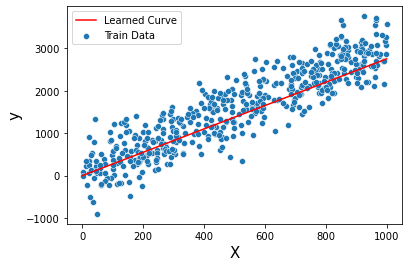

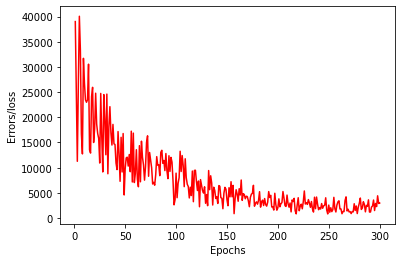

In [22]:
#Example of mini-batch GD
#Model Building
batch_size = int(X_train.shape[0] / 50)
model = linear_regression(lr= 0.000001,epochs=300,criterion='mini-batch',batch_size= batch_size)
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)
model.plot_error()

**Batch GD VS Stocastic GD VS MINI-Batch GD**
> - Loss function reduced smoothly using **Batch-GD**, but the cost of iterating 20 times to get acceptable loss by computing whole dataset in gradient calculation is costly. It may not seems to be now, but what if length of the data set is million? </br>
> - Whereas in **Stochastic GD**, we are taking random sample for gradient calculation. Thus, we are calulating the approximation of gradient opposed to real gradient in Batch GD. Thus error graph has noise, but over large epochs it reduces significantlly. Even though it take large epoch, but cost of each epoch is very less. So incase of large data size, stochastic GD is a better option than Batch GD.
> - One option to reduce the noise in loss graph is to make use of both method above, rather than processing whole dataset we can take a batch of random sample from data to calculate gradient. It is more accurate estimatation of gradient. Thus low noise along with less epochs it takes for converging in case of **Mini-Batch GD**.